### Import required libraries

In [ ]:
require 'nn';
require 'cudnn';
require 'cunn';

### Set the GPU number (>0)

In [2]:
cutorch.setDevice(1);

### Load the trainined model

In [3]:
net = torch.load("checkpoints/regression/net.t7")
net:evaluate()

## Sample Data and it's steering angles


* center/1475187670708132657.png 0.0244346093386
* center/1475187624602002305.png 0.017488199193
* center/1475187429924572147.png 0.118682391942
* center/1475187596947995908.png 0.0324282180518
* center/1475187051021686303.png 0.00349065847695

### Data preprocessing

In [1]:
path = "/do_not_store/ananth/dataset/train/" .. "center/1475187051021686303.png"
img = image.load(path,3,float)

input = image.scale(img, 224, 224)

mean = {-0.083300798050439,-0.10651495109198,-0.17295466315224}
for c=1,3 do
    input[{ c, {}, {} }]:add(-mean[c])
end

path = "/do_not_store/ananth/dataset/train/" .. "center/1475187624602002305.png"
img = image.load(path,3,float)

input1 = image.scale(img, 224, 224)

mean = {-0.083300798050439,-0.10651495109198,-0.17295466315224}
for c=1,3 do
    input1[{ c, {}, {} }]:add(-mean[c])
end

net:cuda();
net:evaluate();
ii = torch.CudaTensor(2,3,224,224)
ii[1] = input
ii[2] = input1

label = torch.CudaTensor(2,1)
label[1] = 0.00349065847695
label[2] = 0.017488199193

### Model Forward

In [2]:
output = net:forward(ii)

model = nn.CosineDistance()
model:cuda()

angle = model:forward{output, label:cuda()}

### Look at the angles

In [74]:
angle

-1.0000
 1.0000
[torch.CudaTensor of size 2]



### Model layers and it's specifications

In [ ]:
net

### Display Layer Activations by changing the layer number

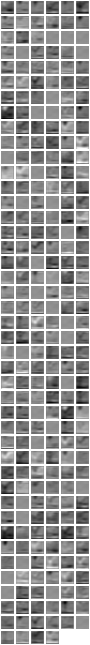

In [27]:
layer = 15 -- must be all the spatial convolution layer
itorch.image(net:get(layer).output[1])

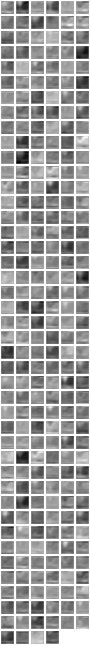

In [30]:
layer = 12 -- must be all the spatial convolution layer
itorch.image(net:get(layer).output[1])

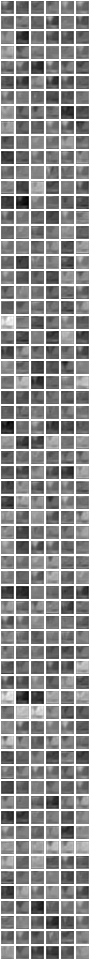

In [21]:
layer = 9 -- must be all the spatial convolution layer
itorch.image(net:get(layer).output[1])

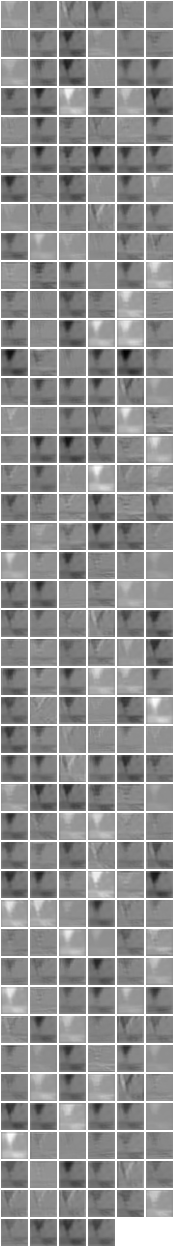

In [22]:
layer = 5 -- must be all the spatial convolution layer
itorch.image(net:get(layer).output[1])

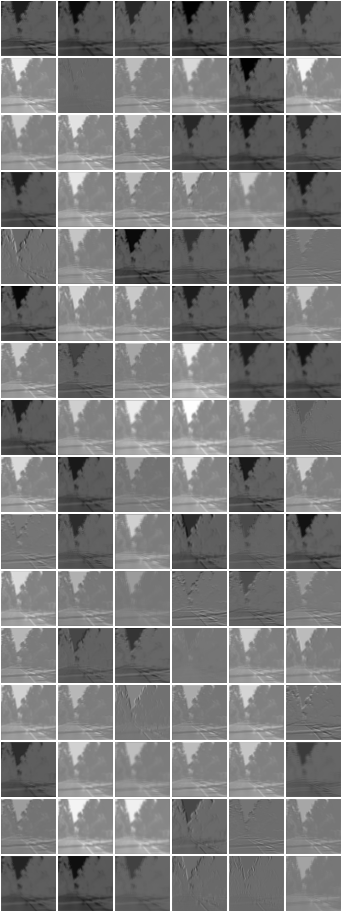

In [23]:
layer = 1 -- must be all the spatial convolution layer
itorch.image(net:get(layer).output[1])